<a href="https://colab.research.google.com/github/Saryu59/fmml/blob/main/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=ca5e140edcbe4872ef193f27cb1ee716d82a5904f83c3498f67f8a6e7be297fb
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [40]:
import wikipedia

topic1 = 'Giraffe'
topic2 = 'Elephant'

# English content
wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

# French content
wikipedia.set_lang('es')
es1 = wikipedia.page('Jirafa').content
es2 = wikipedia.page('Elefante').content

In [41]:


def cleanup(text):
    text = text.lower()  # make all lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # keep only lowercase a-z and spaces
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with one
    return text.strip()  # remove leading/trailing spaces

In [42]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [44]:
print(eng1)
print(es1)

the giraffe is a large african hoofed mammal belonging to the genus giraffa it is the tallest living terrestrial animal and the largest ruminant on earth it is classified under the family giraffidae along with its closest extant relative the okapi traditionally giraffes have been thought of as one species giraffa camelopardalis with nine subspecies most recently researchers proposed dividing them into four extant species which can be distinguished by their fur coat patterns six valid extinct species of giraffa are known from the fossil record the giraffes distinguishing characteristics are its extremely long neck and legs hornlike ossicones and spotted coat patterns its scattered range extends from chad in the north to south africa in the south and from niger in the west to somalia in the east giraffes usually inhabit savannahs and woodlands their food source is leaves fruits and flowers of woody plants primarily acacia species which they browse at heights most other groundbased herbiv

In [32]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

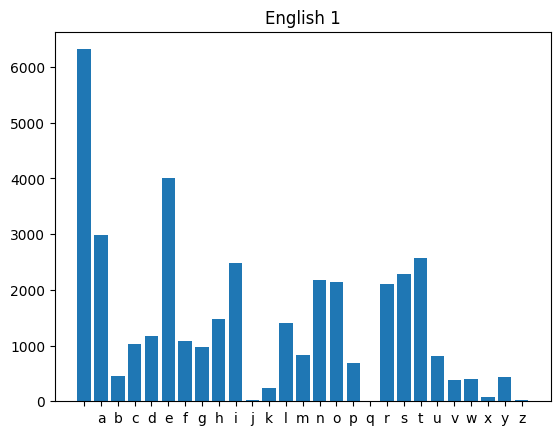

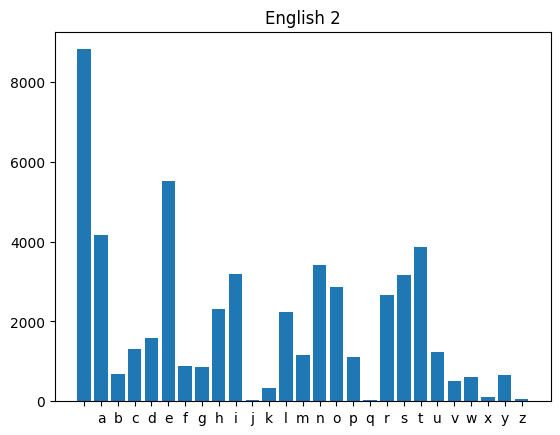

In [33]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

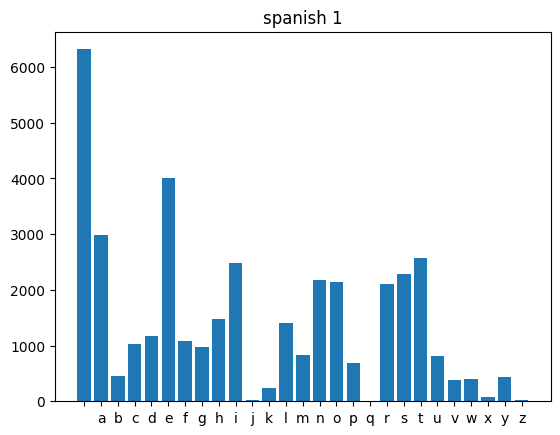

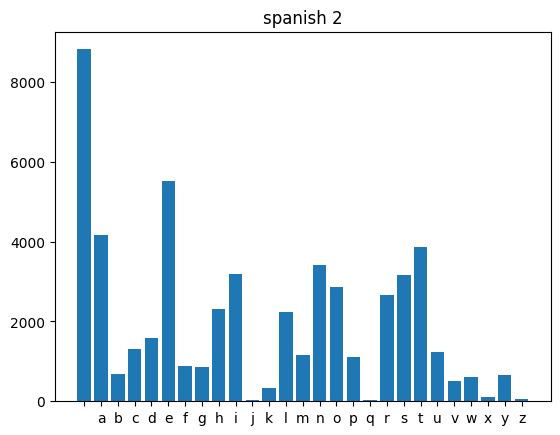

In [45]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_eng1)
plt.title('spanish 1')
plt.show()
unigram_fr2 = Counter(ngrams(es2,1))
plothistogram(unigram_eng2)
plt.title('spanish 2')
plt.show()